# Parsing Dates

## 환경 설정

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# 2007-2016년 사이에 발생한 산사태 정보가 담긴 데이터셋
landslides = pd.read_csv("Data/catalog.csv")

np.random.seed(0)

## 날짜 column의 자료형 확인

In [36]:
# 데이터 일부 확인

landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [39]:
# 사람이 보기엔 날짜가 맞지만 dtype이 object
# 파이썬은 이 column이 날짜임을 알지 못함

print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


In [40]:
# date column의 dtype 확인
# O는 object의 약어

landslides['date'].dtype

dtype('O')

## 날짜로 변환 (파싱)
- 날짜 포맷 예시
  - 1/17/07 -> %m/%d/%y
  - 17-1-2007 -> %d-%m-%Y

In [42]:
# 파싱된 데이터를 가지는 새로운 column을 생성

landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")

In [45]:
# 첫 5개 column 출력
# dtype이 datetime64로 바뀌었고 표시도 기본 포맷 (YYYY-MM-DD)로 정렬됨

landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

In [ ]:
# 날짜 column에 여러 포맷이 섞여 있어 에러가 날 때는 추론 시도 가능
# 권장되진 않음 (추론 실패 가능성, 속도 저하)

landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)

## 일(day) 추출

In [50]:
# 날짜에서 필요한 부분을 쉽게 뽑아낼 수 있음 (ex. day)

day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

## 일(day) 히스토그램

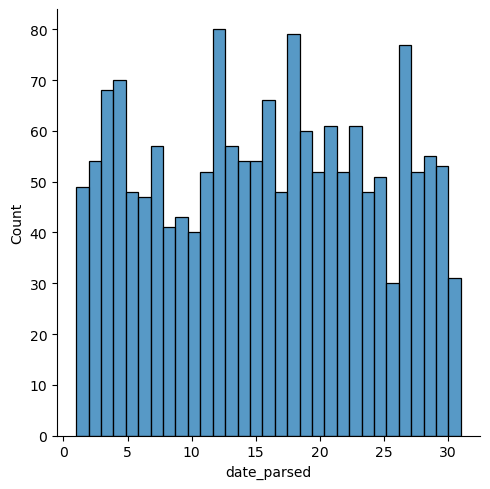

In [56]:
# 날짜 파싱에서 윌/일이 뒤바뀌는 실수가 흔함
# 히스토그램으로 일이 1-31에 잘 분포하는지 체크

# 결측치 제거
day_of_month_landslides = day_of_month_landslides.dropna()

# 히스토그램 생성
sns.displot(day_of_month_landslides, kde=False, bins=31)